## 2. Doublets removal with Scrublet

In [1]:
import scrublet as scr
import pandas as pd
import anndata as an

**Note:** First convert the rds file to a h5ad file with rdsToH5ad.R

In [4]:
crispri = an.read_h5ad('/burg/iicd/users/qc2358/Kinase_project/11-final-output/CDS_crop_hash_FINAL_CRISPR_GBM_T_cells_500_cutoff.h5ad')
crispri

AnnData object with n_obs × n_vars = 200473 × 56648
    obs: 'P7', 'P5', 'sample', 'n.umi', 'cell_ID', 'RT', 'Lig', 'new_cell', 'oligo', 'total_reads.x', 'total_hash_umis_per_cell_ID', 'top_to_second_best_ratio', 'treatment', 'log10.umi', 'percent_mito', 'sgRNA', 'total_reads.y', 'sgRNA_proportion', 'total_sgrna_read_per_cell', 'rank', 'top_to_second', 'second_to_third', 'third_to_next', 'top_proportion', 'second_proportion', 'third_proportion', 'top_sg', 'second_sg', 'third_sg'
    var: 'features'

In [6]:
scrub = scr.Scrublet(crispri.X)
doublet_scores, predicted_doublets = scrub.scrub_doublets()
doublet_scores

Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.64
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 0.4%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 5.1%
Elapsed time: 1080.6 seconds


(<Figure size 800x300 with 2 Axes>,
 array([<Axes: title={'center': 'Observed transcriptomes'}, xlabel='Doublet score', ylabel='Prob. density'>,
        <Axes: title={'center': 'Simulated doublets'}, xlabel='Doublet score', ylabel='Prob. density'>],
       dtype=object))

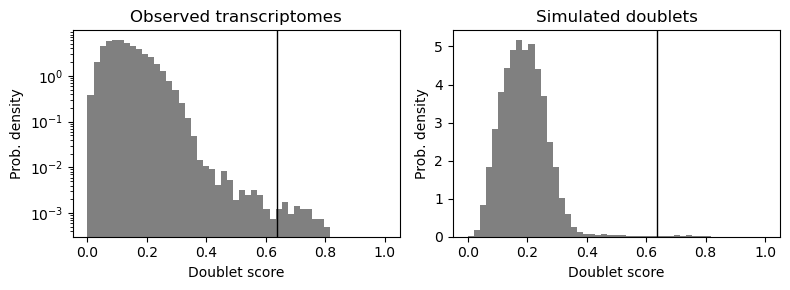

In [17]:
import matplotlib.pyplot as plt
scrub.plot_histogram()

In [10]:
crispri.obs["doublet_score"] = doublet_scores
crispri.obs["is_doublet"] = predicted_doublets
crispri.obs['is_doublet'] = crispri.obs['is_doublet'].astype(str)

In [11]:
# Get counts without using .sum() which might cause issues
true_count = (crispri.obs['is_doublet'] == "True").sum()
false_count = (crispri.obs['is_doublet'] == "False").sum()

# Total count
total = true_count + false_count

# Calculate percentages
true_percent = (true_count / total) * 100 if total > 0 else 0
false_percent = (false_count / total) * 100 if total > 0 else 0

print(f"True values (doublets): {true_count} ({true_percent:.2f}%)")
print(f"False values (singlets): {false_count} ({false_percent:.2f}%)")

True values (doublets): 37 (0.02%)
False values (singlets): 200436 (99.98%)


In [12]:
subset_df = crispri.obs[['cell_ID', 'is_doublet']]
subset_df.to_csv('/burg/iicd/users/qc2358/Kinase_project/11-final-output/doublet_info.csv')